<a href="https://colab.research.google.com/github/richmugwa1/A-Simple-Linear-Regression-Model/blob/master/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Check the version of tensorflow

In [0]:
%tensorflow_version 2.x

# Import Modules to be used in a linear regression

In [0]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# Define the granuality of the reporting (How detailed is the data)

In [0]:
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# Import and manage a Dataset (.csv) into a Pandas dataframe 

In [98]:
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66900.0
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80100.0
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85700.0
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73400.0
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65500.0


Scale the values in the label (median_house_value)

In [0]:
training_df["median_house_value"] /=1000.0


Get Statistics on the dataset to understand the data a little more

In [100]:
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


# Build and Train the Model

Define a function that builds a model

In [0]:
def build_model(my_learning_rate):
  model = tf.keras.models.Sequential() #Most simple tf keras model is sequential
  model.add(tf.keras.layers.Dense(units=1, input_shape = (1, ))) # Define a topography of the model with is a single node in a single layer in a simple linear regression model
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate), 
                loss = "mean_squared_error", 
                metrics = [tf.keras.metrics.RootMeanSquaredError()]) #Compile model by configuring training to minimize the mean squared error
  return model



Define a function that trains the model

In [0]:
def train_model(model, df, feature, label, epochs, batch_size):
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs) # Feed the model with the feature and label values. It will train for a specified number of epochs.
  trained_weight = model.get_weights()[0] #Gather the trained model's weight
  trained_bias = model.get_weights()[1] #Gather the trained model's bias
  epochs = history.epoch # The list of epochs is stored separately from the rest of history
  hist = pd.DataFrame(history.history) #Isolate the error for each epoch
  rmse = hist["root_mean_squared_error"] # Take a snap of the rmse at each epoch
  return trained_weight, trained_bias, epochs, rmse 




# Plot the Model

Define functions that plot the model

In [0]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  plt.xlabel(feature)
  plt.ylabel(label) # Labeling the axes
  random_examples = training_df.sample(n=200) # Pick 200 random examples from the dataset
  plt.scatter(random_examples[feature], random_examples[label]) #Scatter points of random examples
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0,x1], [y0,y1], c='r' ) # plot a red line that represents the model starting at coordinates(x0,y0) and ends at (x1,y1)
  plt.show() # Render the scatter plot and the redline



Plot the loss curve

In [0]:
def plot_the_loss_curve(epochs, rmse):
  plt.figure()
  plt.xlabel ("Epoch")
  plt.ylabel ("Root Main Square Error")
  plt.plot(epochs, rmse, label = "Loss" )
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()
  


#Call the model functions

Epoch 1/30
567/567 [==============================] - 1s 892us/step - loss: 2832907.7500 - root_mean_squared_error: 1683.6127
Epoch 2/30
567/567 [==============================] - 1s 900us/step - loss: 28448.3008 - root_mean_squared_error: 168.6622
Epoch 3/30
567/567 [==============================] - 0s 854us/step - loss: 27529.5469 - root_mean_squared_error: 165.9292
Epoch 4/30
567/567 [==============================] - 0s 874us/step - loss: 26818.7988 - root_mean_squared_error: 163.7764
Epoch 5/30
567/567 [==============================] - 0s 864us/step - loss: 25986.0938 - root_mean_squared_error: 161.2175
Epoch 6/30
567/567 [==============================] - 0s 877us/step - loss: 25370.6016 - root_mean_squared_error: 159.2643
Epoch 7/30
567/567 [==============================] - 0s 849us/step - loss: 24762.0508 - root_mean_squared_error: 157.3406
Epoch 8/30
567/567 [==============================] - 0s 881us/step - loss: 24115.0391 - root_mean_squared_error: 155.3025
Epoch 9/30
56

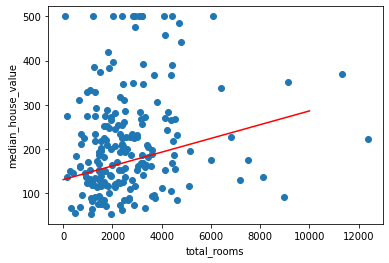

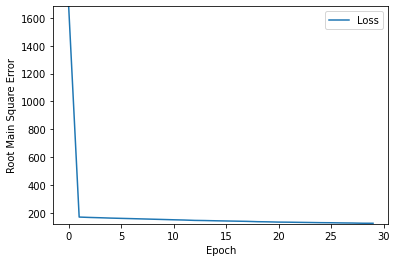

In [108]:
learning_rate = 0.01
epochs = 30
batch_size = 30
my_feature = "total_rooms"
my_label = "median_house_value"
my_model = None
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                        my_feature, my_label, epochs, batch_size)
print("\nThe learned weight of your model is %.4f" % weight)
print("The leaned bias of your model is %.4f\n"% bias)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)